In [1]:
activity <- read.csv("/content/activity.csv")

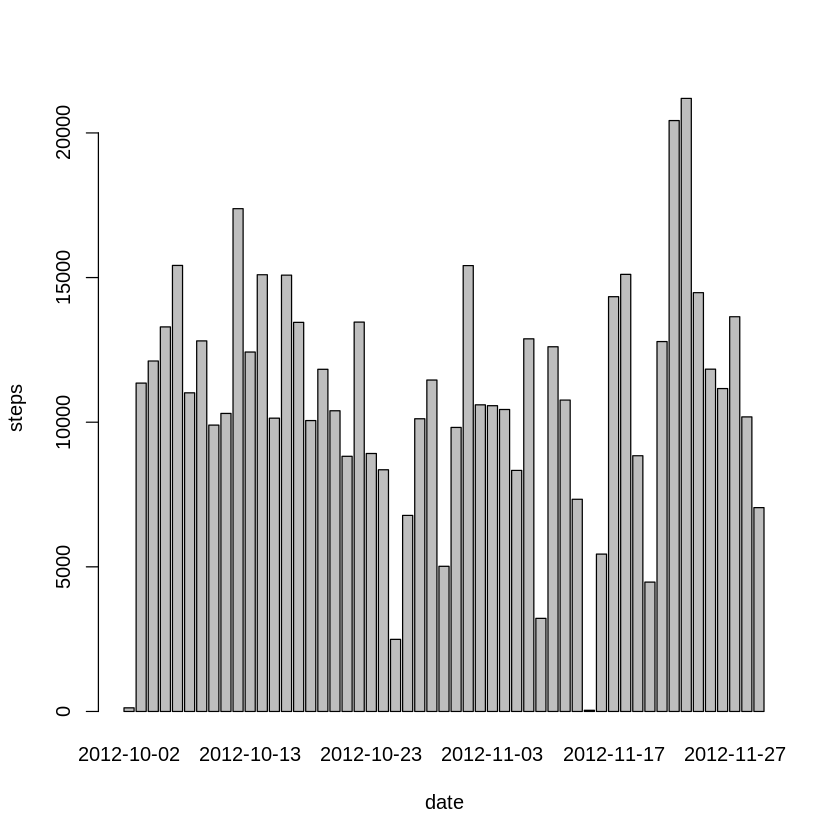

In [2]:
steps.date <- aggregate(steps ~ date, data=activity, FUN=sum)
barplot(steps.date$steps, names.arg=steps.date$date, xlab="date", ylab="steps")

In [3]:
mean(steps.date$steps)
median(steps.date$steps)

[1] 10766.19

[1] 10765

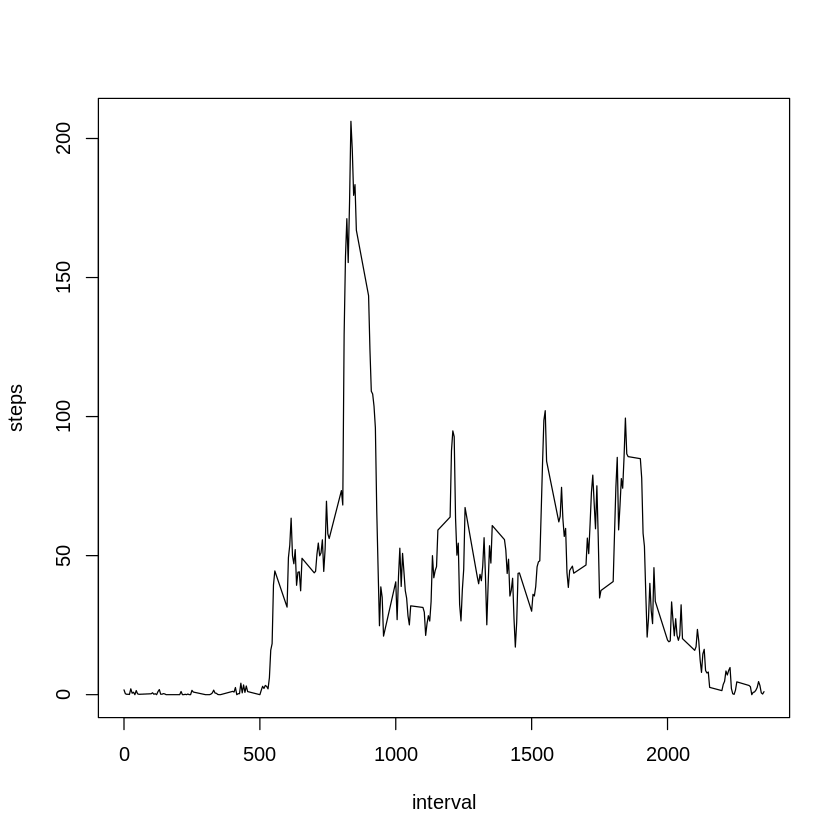

In [4]:
steps.interval <- aggregate(steps ~ interval, data=activity, FUN=mean)
plot(steps.interval, type="l")

In [5]:
steps.interval$interval[which.max(steps.interval$steps)]

[1] 835

In [6]:
sum(is.na(activity))

[1] 2304

In [7]:
activity <- merge(activity, steps.interval, by="interval", suffixes=c("",".y"))
nas <- is.na(activity$steps)
activity$steps[nas] <- activity$steps.y[nas]
activity <- activity[,c(1:3)]

[1] 10766.19

[1] 10766.19

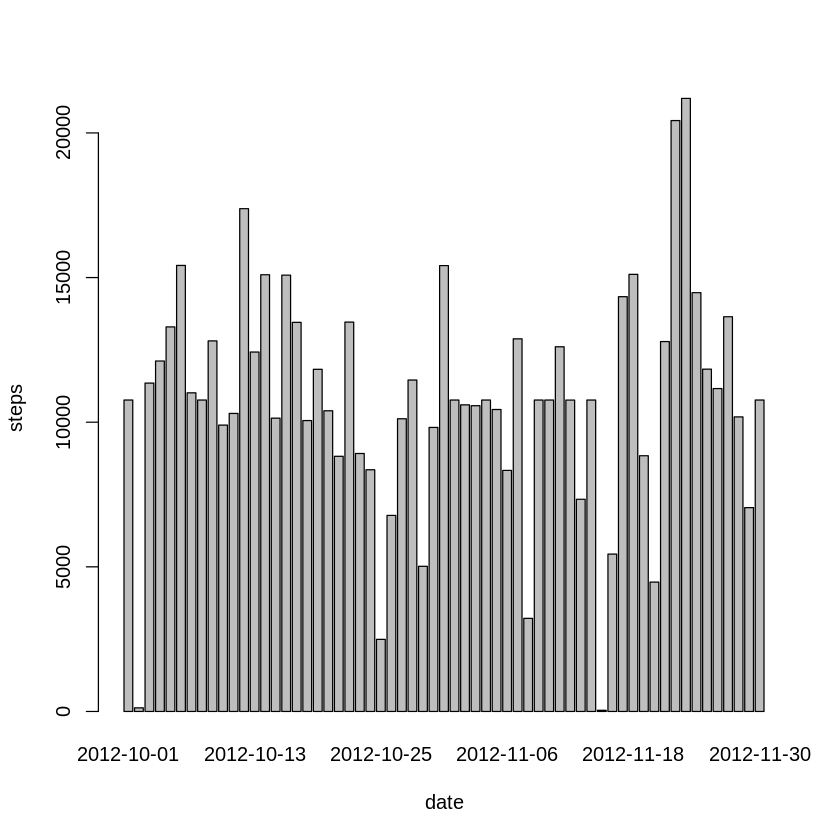

In [9]:
steps.date <- aggregate(steps ~ date, data=activity, FUN=sum)
barplot(steps.date$steps, names.arg=steps.date$date, xlab="date", ylab="steps")
mean(steps.date$steps)
median(steps.date$steps)

In [10]:
daytype <- function(date) {
    if (weekdays(as.Date(date)) %in% c("Saturday", "Sunday")) {
        "weekend"
    } else {
        "weekday"
    }
}
activity$daytype <- as.factor(sapply(activity$date, daytype))

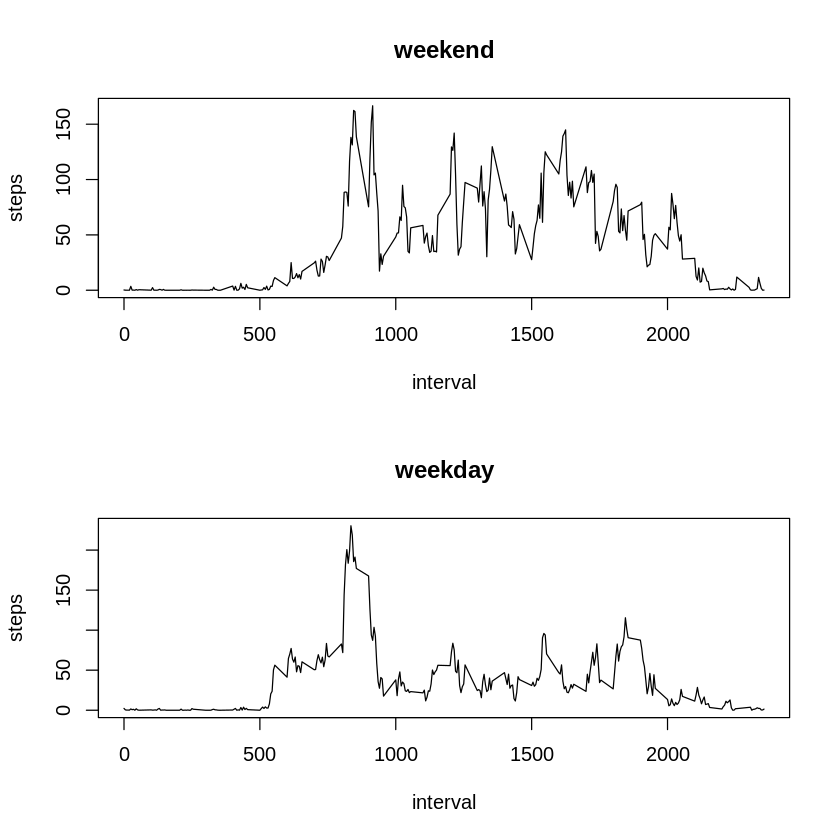

In [11]:
par(mfrow=c(2,1))
for (type in c("weekend", "weekday")) {
    steps.type <- aggregate(steps ~ interval,
                            data=activity,
                            subset=activity$daytype==type,
                            FUN=mean)
    plot(steps.type, type="l", main=type)
}